In [1]:
!pip install prophet

In [2]:
!pip install pandas matplotlib scikit-learn


In [3]:
import pandas as pd
df = pd.read_csv('sales_data.csv')
df.head()

,Date,Sales
0,2021-01-01,20000
1,2021-02-01,22000
2,2021-03-01,21000
3,2021-04-01,25000
4,2021-05-01,24000


In [4]:
import pandas as pd

# Load CSV
df = pd.read_csv('sales_data.csv')

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename columns for Prophet
df_prophet = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

df_prophet.head()


,ds,y
0,2021-01-01,20000
1,2021-02-01,22000
2,2021-03-01,21000
3,2021-04-01,25000
4,2021-05-01,24000


In [5]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)

# Forecast next 12 months
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# View forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_eliydi/8m0moeg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_eliydi/bskmli1h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30996', 'data', 'file=/tmp/tmpe_eliydi/8m0moeg9.json', 'init=/tmp/tmpe_eliydi/bskmli1h.json', 'output', 'file=/tmp/tmpe_eliydi/prophet_modelgsg3i0hv/prophet_model-20250520083840.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:38:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:38:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

,ds,yhat,yhat_lower,yhat_upper
43,2024-07-31,60855.395837,60074.490626,61667.734453
44,2024-08-31,61409.382945,60594.912868,62221.019685
45,2024-09-30,62827.623852,61979.683488,63674.828504
46,2024-10-31,64740.945486,63771.589107,65670.109664
47,2024-11-30,65099.977665,64114.055226,66005.523329


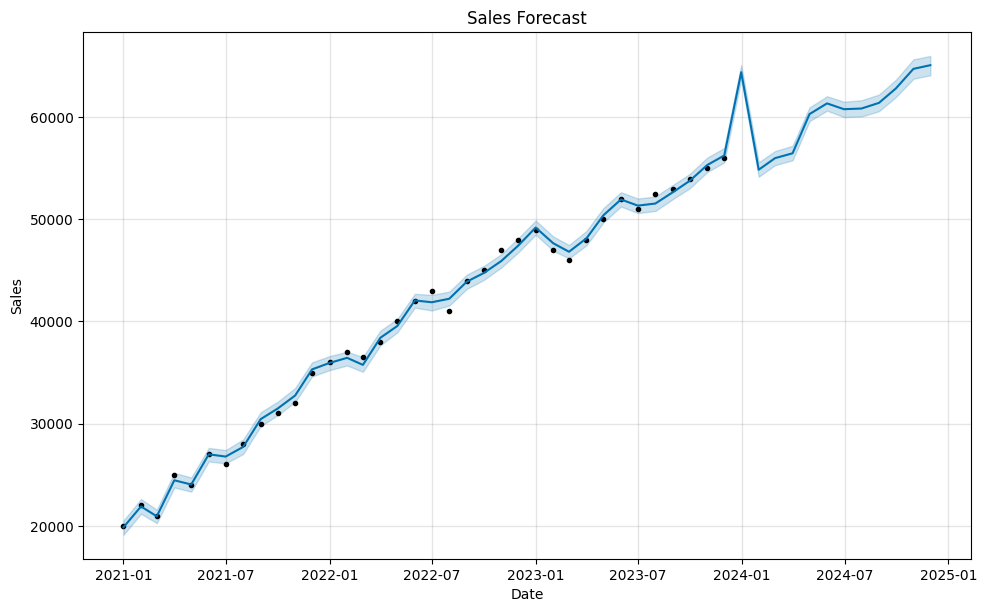

In [6]:
import matplotlib.pyplot as plt

fig1 = model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [7]:
fig1.savefig("forecast_plot.png")
